# TP n°2 sur la classification des données 

### 1. Importation des librairies

In [2093]:
# Importation des Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importation des Algorithmes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importation des Metriques
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

### 2. Charger les donnees (LoadApproval Prediction)

---

In [2096]:
# 2. Charger les donnees
data = pd.read_csv('Data/LoanApprovalPrediction.csv')
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### 3. Analyse des données 

---

In [2099]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [2100]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [2101]:
data['Gender'].value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

In [2102]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [2103]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [2104]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [2105]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [2106]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [2107]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

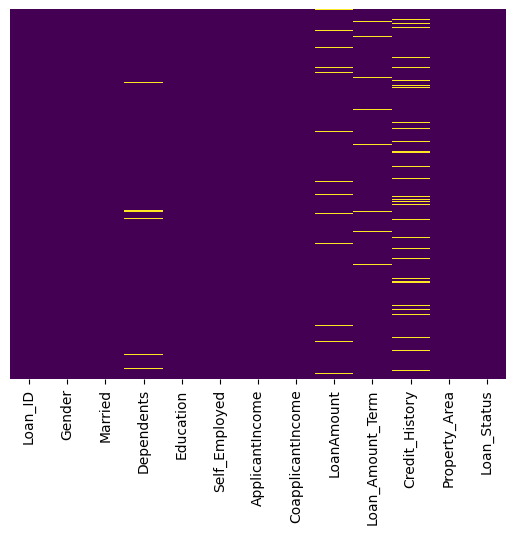

In [2108]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [2109]:
# supprimer un colums
data.drop(columns='Loan_ID', inplace=True, axis=1)

In [2110]:
print(data.shape)
data.head()

(598, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Convertir les donnees categorielles en numeriques
#### 1ere Methode : Mapping

In [2112]:
Gender_mapping = {
    'Male':1,
    'Female':0
}
data['Gender'] = data['Gender'].map(Gender_mapping)
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


#### 2ieme methode : Numpy.Where

In [2114]:
data['Married'] = np.where(data['Married'] == 'Yes', 1, 0)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### 3ieme methode : LabelEncoder

In [2116]:
encoder = LabelEncoder()
data['Education'] = encoder.fit_transform(data['Education'])
data['Self_Employed'] = encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = encoder.fit_transform(data['Loan_Status'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### informations sur la data 

In [2118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 56.2 KB


#### Gestion des donnees manquantes : Imputation

---

In [2121]:
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [2122]:
data['Dependents'].fillna(data['Dependents'].mean(), inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### visualisation des donnees 

<Axes: >

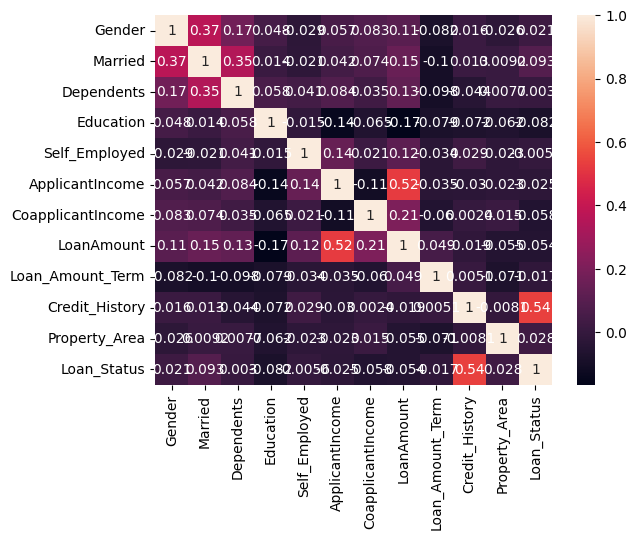

In [2124]:
sns.heatmap(data.corr(), annot=True)

In [2125]:
data.corr().Loan_Status.sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.535930
Married              0.093183
Property_Area        0.028315
Gender               0.021239
Dependents           0.003008
Self_Employed       -0.005605
Loan_Amount_Term    -0.017305
ApplicantIncome     -0.025248
LoanAmount          -0.054283
CoapplicantIncome   -0.058194
Education           -0.081617
Name: Loan_Status, dtype: float64

In [2126]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 5. Division des donnees

---

#### 5. Division des donnees en Variables Indep et Dep

In [2130]:
print(data.shape)
X = data.iloc[ : , :-1]
y = data.iloc[ : , -1]

(598, 12)


In [2131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                 test_size=0.32, 
                 train_size=0.68, 
                 random_state=35)

In [2132]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (406, 11)
X_test: (192, 11)
y_train: (406,)
y_test: (192,)


####  pd.set_option('display.max_rows', None)

In [2134]:
data['Loan_Status'].unique()

array([1, 0])

In [2135]:
X.shape

(598, 11)

In [2136]:
y.shape

(598,)

#### 6.Algorithme et  Construction des Modeles

#### 6.1 Logistic Regression

---

[[ 29  33]
 [  3 127]]


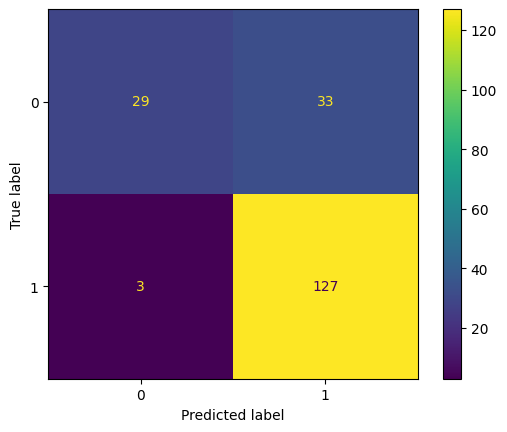

In [2140]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)

In [2141]:
print("Accuracy de LR:", accuracy_score(y_test, y_pred_lr))
print("Precision de LR:",precision_score(y_test, y_pred_lr))
print("Recall de LR:",recall_score(y_test, y_pred_lr))
print("F1-Score de LR:",f1_score(y_test, y_pred_lr))
print("MSE de LR:",mean_squared_error(y_test, y_pred_lr))

Accuracy de LR: 0.8125
Precision de LR: 0.79375
Recall de LR: 0.9769230769230769
F1-Score de LR: 0.8758620689655172
MSE de LR: 0.1875


#### 6.2 Support Vector Machine

---

[[  0  62]
 [  1 129]]


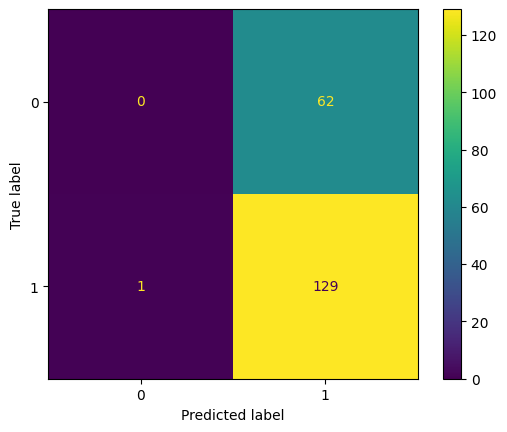

In [2144]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test)

In [2145]:
print("Accuracy de SVM:", accuracy_score(y_test, y_pred_svm))
print("Precision de SVM:",precision_score(y_test, y_pred_svm))
print("Recall de SVM:",recall_score(y_test, y_pred_svm))
print("F1-Score de SVM:",f1_score(y_test, y_pred_svm))
print("MSE de SVM:",mean_squared_error(y_test, y_pred_svm))

Accuracy de SVM: 0.671875
Precision de SVM: 0.675392670157068
Recall de SVM: 0.9923076923076923
F1-Score de SVM: 0.8037383177570093
MSE de SVM: 0.328125


#### 6.3  Random Forest

---

[[ 33  29]
 [  7 123]]


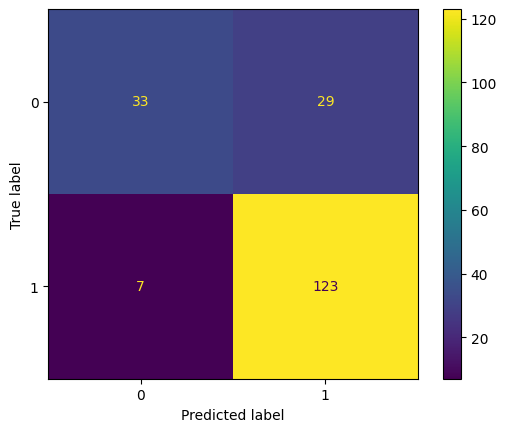

In [2148]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)

In [2149]:
print("Accuracy de RF:", accuracy_score(y_test, y_pred_rf))
print("Precision de RF:",precision_score(y_test, y_pred_rf))
print("Recall de RF:",recall_score(y_test, y_pred_rf))
print("F1-Score de RF:",f1_score(y_test, y_pred_rf))
print("MSE de RF:",mean_squared_error(y_test, y_pred_rf))

Accuracy de RF: 0.8125
Precision de RF: 0.8092105263157895
Recall de RF: 0.9461538461538461
F1-Score de RF: 0.8723404255319149
MSE de RF: 0.1875


#### 6.4 Decision Tree

---

Decision Tree Confusion Matrix:
[[ 36  26]
 [ 26 104]]


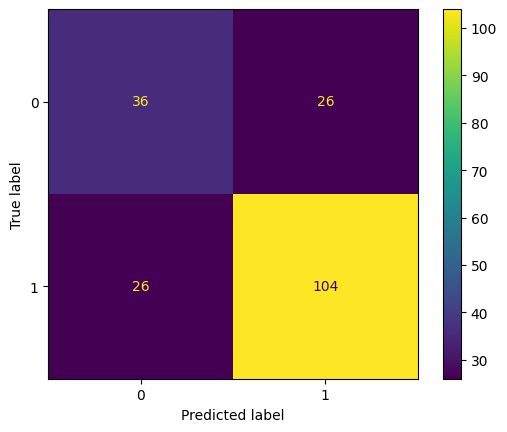

In [2152]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test)

In [2153]:
print("Accuracy de RF:", accuracy_score(y_test, y_pred_rf))
print("Precision de RF:",precision_score(y_test, y_pred_rf))
print("Recall de RF:",recall_score(y_test, y_pred_rf))
print("F1-Score de RF:",f1_score(y_test, y_pred_rf))
print("MSE de RF:",mean_squared_error(y_test, y_pred_rf))

Accuracy de RF: 0.8125
Precision de RF: 0.8092105263157895
Recall de RF: 0.9461538461538461
F1-Score de RF: 0.8723404255319149
MSE de RF: 0.1875


#### 6.5 K-Nearest Neighbors

---

KNN Confusion Matrix:
[[ 15  47]
 [ 17 113]]


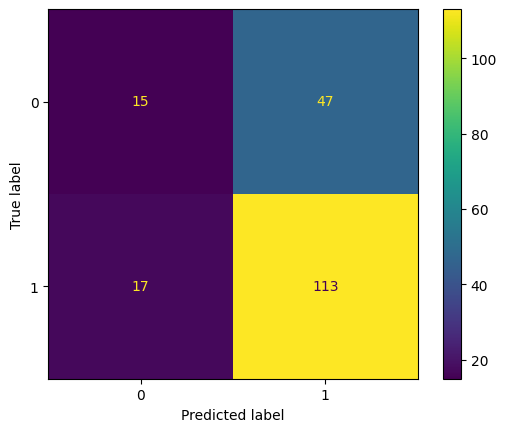

In [2156]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_estimator(model_knn, X_test, y_test)

In [2157]:
print("Accuracy de RF:", accuracy_score(y_test, y_pred_rf))
print("Precision de RF:",precision_score(y_test, y_pred_rf))
print("Recall de RF:",recall_score(y_test, y_pred_rf))
print("F1-Score de RF:",f1_score(y_test, y_pred_rf))
print("MSE de RF:",mean_squared_error(y_test, y_pred_rf))

Accuracy de RF: 0.8125
Precision de RF: 0.8092105263157895
Recall de RF: 0.9461538461538461
F1-Score de RF: 0.8723404255319149
MSE de RF: 0.1875


### 7. Evaluer le modele

### 8. comparaison d'algorithme avec des metrique 

### 9. Prediction

In [2161]:
data.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1


In [2162]:
model_lr.predict([[1,	0,	0.0,	0,	0,	5849,	0.0,	144.968804,	360.0,	1.0,	2]])

array([1])

#### Prédiction avec Logistic Regression

---

In [2165]:
print(model_lr.predict([[1,	0,	0.0,	0,	0,	5849,	0.0,	144.968804,	360.0,	1.0,	2]]))

[1]


In [2166]:
X.shape

(598, 11)

In [2167]:
print(model_lr.predict([[1,	1,	0.0,	1,	0,	2583,	2358.0,	120.000000,	360.0,	1.0,	2	]]))

[1]


#### Prédiction avec Support Vector Machine

---

In [2170]:
print("SVM Prediction:", model_svm.predict([[1, 0, 0.0, 0, 0, 5849, 0.0, 144.968804, 360.0, 1.0, 2]]))

SVM Prediction: [1]


#### Prédiction avec Random Forest

---

In [2173]:
print("Random Forest Prediction:", model_rf.predict([[1, 0, 0.0, 0, 0, 5849, 0.0, 144.968804, 360.0, 1.0, 2]]))

Random Forest Prediction: [1]


#### Prédiction avec Decision Tree

---

In [2176]:
print("Decision Tree Prediction:", model_dt.predict([[1, 0, 0.0, 0, 0, 5849, 0.0, 144.968804, 360.0, 1.0, 2]]))

Decision Tree Prediction: [1]


#### Prédiction avec K-Nearest Neighbors

In [2178]:
print("KNN Prediction:", model_knn.predict([[1, 0, 0.0, 0, 0, 5849, 0.0, 144.968804, 360.0, 1.0, 2]]))

KNN Prediction: [1]
